In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("/home/pedranji/Projects/CarPerformance/data/ElectricMotorMeasures/measures_v2.csv")


### Dataset description
- u_q: Voltage q-component measurement in dq-coordinates (in V)
- coolant : coolant temperature in °C
- stator_winding: Stator winding temperature (in °C) measured with thermocouples
- u_d : Voltage d-component measurement in dq-coordinates
- stator_tooth : Stator tooth temperature (in °C) measured with thermocouples
- motor_speed : Motor speed (in rpm)
- i_d : Current d-component measurement in dq-coordinates
- pm : Permanent Magnet temperature (in °C) measured with thermocouples and transmitted wirelelessly via a thermography unit.
- stator_yoke : Stator yoke temperature (in °C) measured with thermocouples
- ambient : Ambient temperature (in °C)
- torque : Motor torque (in Nm)
- profile_id : Measurement session id. Each distinct measurement session can be identified through this integer id.

This dataset is from (kaggle)[https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature]. Thanks.

### Objective
Predict engine torque based on the other features. This is due to the fact that it is not economically wise to measure torque in a normal production vehicle.
Another interesting measure to predict is rotor temperature (pm), which wouldn't be sound to measure in a production vehicle.


In [8]:
# reorder columns so that torque is the last column and profile_id is the first column
df = df[["profile_id", "ambient", "coolant", "u_d", "u_q","motor_speed", "i_d", "i_q", "pm", "stator_yoke", "stator_tooth", "stator_winding",  "torque"]]

In order to do this, we will use a Recursive Neural Network. This is due to the fact that the data is organized in a time series. Not taking this important fact into account would be suboptimal, given that datapoints are affected by the previous ones. For example, a high torque value at time t-1 will most likely result in a high torque value at time t.

### Scaling: Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create a copy to maintain the original dataframe.
df_scaled = df.copy(deep=True)

# Apply the scaler to the data subset (all columns except the 'profile_id' and 'motor_speed' columns)
for col in df_scaled.columns[2:-1]:
    df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1, 1))

# Apply the scaler to the target column in a separate scaler so that we can inverse transform later.
scaler_target = StandardScaler()
df_scaled["torque"] = scaler_target.fit_transform(df_scaled["motor_speed"].values.reshape(-1, 1))

<Axes: >

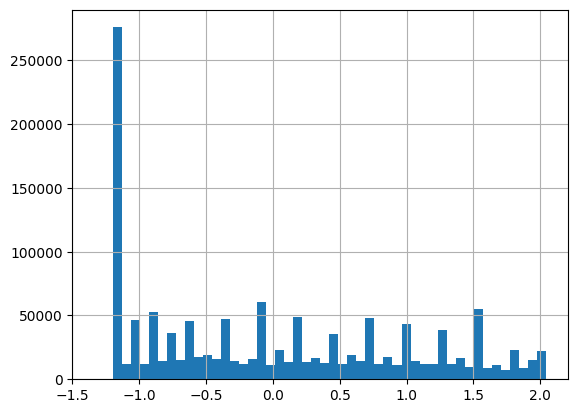

In [14]:
df_scaled["torque"].hist(bins=50)

In [20]:
# set index to the profile_id
df_scaled.set_index("profile_id", inplace=True)

In [21]:
df_scaled

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,torque
profile_id,,,,,,,,,,,,
17,19.850691,-0.799812,0.392820,-1.238979,-1.184128,1.058337,-0.405855,-1.786837,-1.494244,-1.681117,-1.648158,-1.184128
17,19.850672,-0.799197,0.393521,-1.236150,-1.184129,1.058278,-0.405867,-1.787686,-1.494323,-1.681047,-1.647959,-1.184129
17,19.850657,-0.798729,0.392464,-1.238757,-1.184128,1.058289,-0.405854,-1.787338,-1.493755,-1.681078,-1.648064,-1.184128
17,19.850647,-0.798417,0.393356,-1.236180,-1.184126,1.058270,-0.405836,-1.786847,-1.493529,-1.681146,-1.648285,-1.184126
17,19.850639,-0.797432,0.393101,-1.239442,-1.184127,1.057279,-0.405455,-1.786248,-1.493738,-1.681195,-1.648303,-1.184127
...,...,...,...,...,...,...,...,...,...,...,...,...
71,23.989078,-0.252853,0.410918,-1.277497,-1.184129,1.027466,-0.393952,0.191617,-0.476927,-0.651102,-0.734801,-1.184129
71,23.970700,-0.252853,0.410713,-1.279909,-1.184128,1.027461,-0.393952,0.191347,-0.476796,-0.653952,-0.736038,-1.184128
71,23.977234,-0.252853,0.411126,-1.277003,-1.184128,1.027480,-0.393939,0.191122,-0.477067,-0.656745,-0.736995,-1.184128


### Feature importance


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_scaled.drop(columns=["torque"]), df_scaled["torque"])
rf.feature_importances_

sequence generation? let's try timedistributed first and then see if I need to go back here

label generation?

Data split

Data loader?

### Model
Time Distributed!